<a href="https://colab.research.google.com/github/ETdan/IcogLabs/blob/main/Task_QC_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
pip install qiskit

In [12]:
pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 79.4 MB/s eta 0:00:00


In [2]:
#pip install qiskit   #remove this to install qiskit
import qiskit

import plot_histogram to show graph and samplerv2 to create a simulater

In [3]:
from qiskit.visualization import plot_histogram # to plot graphs
from qiskit_aer.primitives import SamplerV2  # ideal simulator

# **Create a Quantum Circuit with a Hadamard Gate**

- Write a Qiskit program to create a single-qubit circuit.
- Apply a Hadamard gate to the qubit.
- Measure the qubit and visualize the result using a histogram.

In [4]:
#Insert the code here
circ=qiskit.QuantumCircuit(1) # this to create a circuit
circ.h(0) # create a hadamard gate
circ.measure_all()# measre qubit
circ.draw() # draw the quantem circuit

┌───┐ ░ ┌─┐
     q: ┤ H ├─░─┤M├
        └───┘ ░ └╥┘
meas: 1/═════════╩═
                 0

# **Implement a Quantum Coin Flip**
- Simulate a fair coin flip using a quantum circuit.
- Print the probability of getting Heads or Tails.

### Simulate a coint flip

In [5]:
# coin flip simulate with hadamard to create a supperposition to give us a 50/50 change when measured
circ=qiskit.QuantumCircuit(1)
circ.h(0)
circ.measure_all() # Automatically adds classical bits for all qubits and measure the result
circ.draw()

┌───┐ ░ ┌─┐
     q: ┤ H ├─░─┤M├
        └───┘ ░ └╥┘
meas: 1/═════════╩═
                 0

### Calculate probabilities

Counts: {'0': 63970, '1': 64030}
Probability of Heads: 0.50
Probability of Tails: 0.50


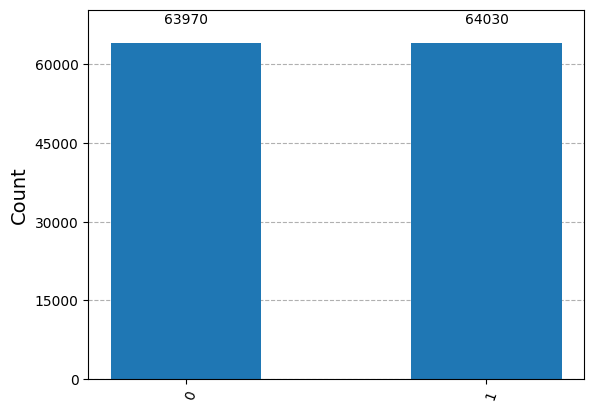

In [6]:
sampler = SamplerV2() # init a simulator

job = sampler.run([circ], shots=128000) # run and collect samples from pub(primitive unified bloc)
result = job.result()
counts = result[0].data.meas.get_counts()
print('Counts:', counts)

# calculation to see the probabilities
total_shots = sum(counts.values())

# assume heads as 0 and tails as 1
prob_heads = counts.get('0', 0) / total_shots
prob_tails = counts.get('1', 0) / total_shots

print(f"Probability of Heads: {prob_heads:.2f}")
print(f"Probability of Tails: {prob_tails:.2f}")

plot_histogram(counts)

### result analysis
- we see that when the number of shot increase the result converges to 50/50

# **Implement a Bell State (Entanglement)**
- Create a two-qubit circuit.
- Apply a Hadamard gate to the first qubit and a CNOT gate between the two qubits.
- Measure both qubits and verify if they are always correlated.

In [7]:
circ=qiskit.QuantumCircuit(2)
circ.h(0)
circ.cx(0,1) # cnot func with the first param as the controller and the second one as the target
circ.measure_all()
circ.draw()

┌───┐      ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤M├───
        └───┘┌─┴─┐ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░──╫─┤M├
             └───┘ ░  ║ └╥┘
meas: 2/══════════════╩══╩═
                      0  1

####Measuring qubits to verify if they are always correlated

Counts(ideal): {'11': 6399299, '00': 6400701}


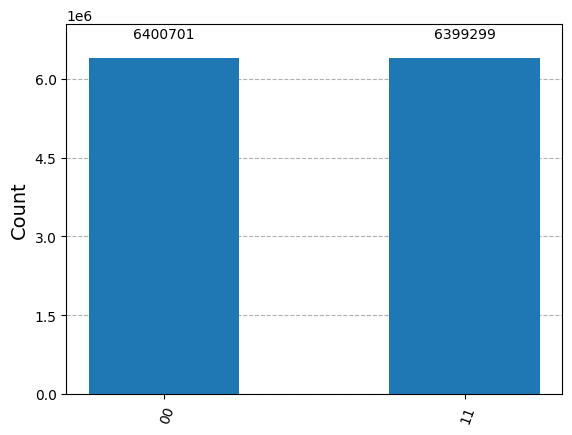

In [9]:

job = sampler.run([circ], shots=12800000) # run and collect samples from pub(primitive unified bloc)

# Perform an ideal simulation
result_ideal = job.result()
counts_ideal = result_ideal[0].data.meas.get_counts()

print('Counts(ideal):', counts_ideal)

plot_histogram(counts_ideal)

# **Generate Plus state**
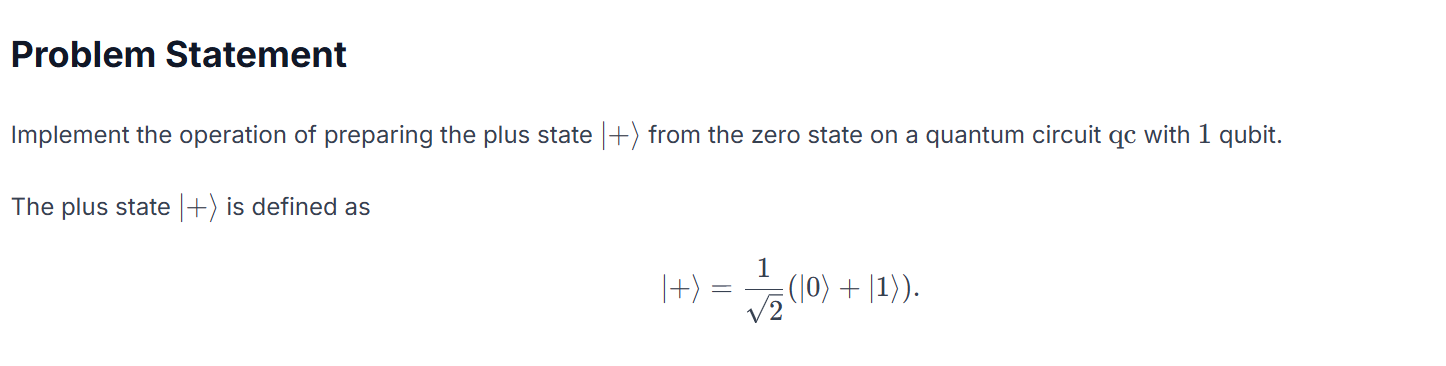

In [11]:
#insert your code here
from qiskit.circuit.library import StatePreparation # to create the said preposition
from numpy import sqrt #to have a sqrt function

In [13]:
# Define the |+> state as a state vector
plus_state = [1/sqrt(2), 1/sqrt(2)]  # (|0⟩ + |1⟩) / sqrt(2)

qc = qiskit.QuantumCircuit(1)

# Use StatePreparation to initialize the qubit
qc.append(StatePreparation(plus_state), [0])

# Draw the circuit
print(qc.draw())


   ┌────────────────────────────────────┐
q: ┤ State Preparation(0.70711,0.70711) ├
   └────────────────────────────────────┘


**alternative**

# **Theory Checkins**

### **How does superposition affect the information processing capabilities of a quantum computer?**

Superposition is a fundamental principle of quantum mechanics that allows quantum bits (qubits) to exist in multiple states simultaneously, unlike classical bits which are either 0 or 1. This property significantly enhances the information processing capabilities of a quantum computer in several ways:

1. **Parallelism**: Superposition enables a quantum computer to perform many calculations at once. For example, a quantum computer with \( n \) qubits can represent \( 2^n \) possible states simultaneously. This parallelism allows quantum algorithms to explore multiple solutions concurrently, providing a massive speedup for certain types of problems.

2. **Complex Problem Solving**: Problems that are computationally infeasible for classical computers, such as factoring large integers (relevant for cryptography) or simulating quantum systems, can be tackled more efficiently by quantum computers. Algorithms like Shor's algorithm for factoring and Grover's algorithm for unstructured search leverage superposition to achieve exponential and quadratic speedups, respectively.

3. **Enhanced Search and Optimization**: Superposition allows quantum computers to evaluate multiple potential solutions simultaneously, making them particularly effective for optimization problems and searching unsorted databases. Grover's algorithm, for instance, can search an unsorted database of \( N \) entries in \( O(\sqrt{N}) \) time, compared to \( O(N) \) for classical algorithms.

4. **Quantum Interference**: Superposition, combined with quantum interference, enables quantum computers to amplify the probability of correct solutions while canceling out incorrect ones. This interference is crucial for the correct functioning of quantum algorithms, ensuring that the desired outcomes are more likely to be observed upon measurement.

5. **Entanglement and Correlation**: Superposition works in tandem with entanglement, another quantum phenomenon, to create complex correlations between qubits. This allows for the creation of highly interconnected states that can represent and process information in ways that classical systems cannot, further enhancing computational power.

In summary, superposition allows quantum computers to process information in a fundamentally different and more powerful way than classical computers, enabling them to solve certain problems much more efficiently. This capability holds promise for breakthroughs in fields such as cryptography, materials science, complex system simulation, and optimization.

###How do quantum gates manipulate interference to solve problems faster than classical computers?

Quantum gates manipulate interference to solve problems faster than classical computers by leveraging the principles of quantum mechanics, such as superposition and entanglement, to enhance computational efficiency. Here's how quantum gates use interference to achieve this:

1. **Superposition and Parallelism**: Quantum gates operate on qubits that can exist in superpositions of states. This allows quantum gates to process multiple states simultaneously. For example, a quantum gate applied to a set of qubits in superposition can perform computations on all possible combinations of states at once, providing a form of massive parallelism.

2. **Quantum Interference**: Quantum gates are designed to manipulate the probability amplitudes of qubit states. Interference occurs when the probability amplitudes of different states combine. Constructive interference increases the probability amplitude of desired states, while destructive interference decreases the probability amplitude of undesired states. By carefully designing quantum gates, algorithms can ensure that the correct solutions interfere constructively, making them more likely to be observed upon measurement.

3. **Entanglement**: Quantum gates can create entangled states, where qubits become correlated in such a way that the state of one qubit is dependent on the state of another, even over large distances. Entanglement allows quantum gates to perform complex operations that involve multiple qubits simultaneously, enabling more sophisticated computations and faster problem-solving.

4. **Algorithm Design**: Quantum algorithms, such as Shor's algorithm for factoring and Grover's algorithm for search, are specifically designed to exploit interference. For example:
   - **Shor's Algorithm**: Uses quantum gates to create superpositions and perform a quantum Fourier transform, which leverages interference to find the periodicity of a function, crucial for factoring large numbers efficiently.
   - **Grover's Algorithm**: Uses quantum gates to amplify the probability amplitude of the correct solution through a series of operations that create constructive interference for the desired state and destructive interference for others, providing a quadratic speedup for unstructured search problems.

5. **Phase Kickback and Amplitude Amplification**: Quantum gates can use phase kickback to encode information about a function into the phase of a qubit. This information can then be used to amplify the correct solution through amplitude amplification techniques, which rely on interference to increase the likelihood of measuring the correct answer.

In summary, quantum gates manipulate interference by controlling the probability amplitudes of qubit states, ensuring that the correct solutions are amplified and the incorrect ones are diminished. This manipulation, combined with superposition and entanglement, allows quantum computers to explore and process information in ways that classical computers cannot, leading to significant speedups for specific types of problems.

##How does measurement collapse a quantum state, and why is it important in quantum computing algorithms?

Measurement in quantum mechanics is a fundamental process that collapses a quantum state to one of the basis states. This collapse is crucial in quantum computing algorithms because it determines the outcome of a computation. Here's a detailed explanation of how measurement works and why it is important:

### How Measurement Collapses a Quantum State

1. **Quantum Superposition**: Before measurement, a qubit can exist in a superposition of states, represented as a linear combination of basis states. For example, a qubit can be in the state \( \alpha|0\rangle + \beta|1\rangle \), where \( \alpha \) and \( \beta \) are complex probability amplitudes.

2. **Probability Amplitudes**: The probability of measuring the qubit in state \( |0\rangle \) is \( |\alpha|^2 \), and the probability of measuring it in state \( |1\rangle \) is \( |\beta|^2 \). The total probability must sum to 1, i.e., \( |\alpha|^2 + |\beta|^2 = 1 \).

3. **Collapse to Basis State**: When a measurement is performed, the qubit's state collapses to one of the basis states (\( |0\rangle \) or \( |1\rangle \)) with the corresponding probability. For example, if the qubit is measured and found to be in state \( |0\rangle \), the state \( \alpha|0\rangle + \beta|1\rangle \) collapses to \( |0\rangle \).

### Importance of Measurement in Quantum Computing Algorithms

1. **Outcome Determination**: Measurement is the process by which the result of a quantum computation is obtained. After a series of quantum gates have manipulated the qubits, measurement collapses the quantum state to a classical state, providing the final output of the computation.

2. **Algorithm Design**: Quantum algorithms are designed with measurement in mind. They often use interference and amplitude amplification to increase the probability of measuring the correct solution. For example:
   - **Grover's Algorithm**: Amplifies the probability amplitude of the correct solution through a series of operations, making it more likely to be measured.
   - **Shor's Algorithm**: Uses the quantum Fourier transform to create interference patterns that, when measured, provide information about the periodicity of a function, crucial for factoring large numbers.

3. **State Preparation and Verification**: Measurement is used to prepare initial states and verify intermediate states in quantum algorithms. For example, certain algorithms require qubits to be initialized in specific states, and measurement can confirm that the correct initialization has been achieved.

4. **Error Detection and Correction**: Quantum error correction codes rely on measurement to detect and correct errors. By measuring specific qubits (ancilla qubits), errors can be identified and corrected without collapsing the entire quantum state, preserving the integrity of the computation.

5. **Quantum-Classical Interface**: Measurement serves as the interface between the quantum and classical worlds. The results of quantum computations are classical bits, which can be processed by classical computers. This interface is essential for hybrid quantum-classical algorithms, where quantum and classical computations are interleaved.

In summary, measurement collapses a quantum state to a classical state, providing the final result of a quantum computation. It is a critical component of quantum algorithms, enabling the extraction of useful information, ensuring correct state preparation, facilitating error correction, and serving as the bridge between quantum and classical computing.